In [1]:
import json
import numpy as np
import epidemics_helper
import networkx as nx
import folium
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *Your group letter.*

**Names:**

* *Name 1*
* *Name 2*
* *Name 3*

---

#### Instructions

*This is a template for part 3 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.3 Epdemics

#### Exercise 2.9: Simulate an epidemic outbreak

In [2]:
nyc_json = json.load(open('../data/nyc_augmented_network.json', 'br'))

In [3]:
from networkx.readwrite import json_graph

G = json_graph.node_link_graph(nyc_json)

In [4]:
G.number_of_edges()

43437

In [5]:
n = G.number_of_nodes()
n

26481

In [6]:
sir = epidemics_helper.SimulationSIR(G, beta=10.0, gamma=0.1)

In [7]:
sir.launch_epidemic(source=23654, max_time=100.0)

Epidemic stopped after 110.82 days | 110.82 days elapsed | 0.1% susceptible, 0.0% infected, 99.9% recovered


In [8]:
infected = np.asarray([len([x for x in sir.inf_time if x <= i]) for i in range(100)])
recovered = np.asarray([len([x for x in sir.rec_time if x <= i]) for i in range(100)])

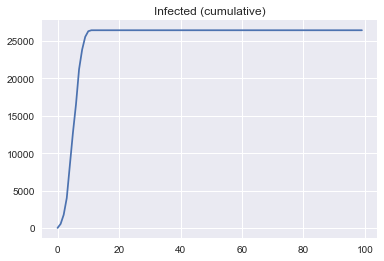

In [9]:
plt.title('Infected (cumulative)')
plt.plot(infected)
plt.show()

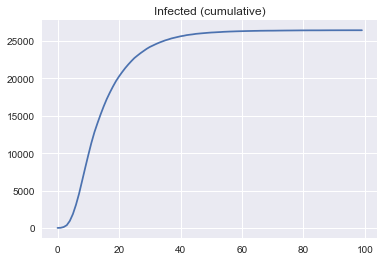

In [10]:
plt.title('Infected (cumulative)')
plt.plot(recovered)
plt.show()

In [11]:
all_nodes = np.asarray(G.nodes())

In [12]:
all_nodes.shape

(26481,)

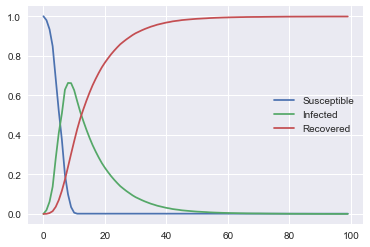

In [18]:
stat_susceptible = []
stat_infected = []
stat_recovered = []

for i in range(100):
    cum_infected = np.where(sir.inf_time <= i)
    
    recovered = np.where(sir.rec_time <= i)
    stat_recovered.append(recovered[0])
    
    infected = np.setdiff1d(cum_infected, recovered)
    stat_infected.append(infected)
    
    susceptible = np.setdiff1d(all_nodes, cum_infected)
    stat_susceptible.append(susceptible)
    
stat_susceptible = np.asarray(stat_susceptible)
stat_infected = np.asarray(stat_infected)
stat_recovered = np.asarray(stat_recovered)    

# Normalize the statistics    
plot_s = np.asarray([len(x) for x in stat_susceptible]) / n
plot_i = np.asarray([len(x) for x in stat_infected]) / n
plot_r = np.asarray([len(x) for x in stat_recovered]) / n

plt.plot(plot_s)
plt.plot(plot_i)
plt.plot(plot_r)
plt.legend(['Susceptible', 'Infected', 'Recovered'])
plt.show()    

In [19]:
print("After {} days, 60% are infected.".format(np.min(np.where(plot_i > .60))))

After 7 days, 60% are infected.


In [20]:
print("After {} days, 60% are dead.".format(np.min(np.where(plot_r > .60))))

After 15 days, 60% are dead.


# Maps:

In [21]:
def convert_coordinate(coord):
    return [coord[1] / 1e6, coord[0] / 1e6]

def split_coordinates(coords):
    x = [c[0] for c in coords]
    y = [c[1] for c in coords]
    
    return x, y

def get_coordinates(stats, day):
    coords = [G.node[n]['coordinates'] for n in stats[day]]

    converted = [convert_coordinate(coord) for coord in coords]
    x, y = split_coordinates(converted)
    
    return x, y


In [32]:
def visualize_spread(day):
    x_s, y_s = get_coordinates(stat_susceptible, day)
    x_i, y_i = get_coordinates(stat_infected, day)
    x_r, y_r = get_coordinates(stat_recovered, day)

    plt.scatter(x_s, y_s, c='g')
    plt.scatter(x_i, y_i, c='b')
    plt.scatter(x_r, y_r, c='r')
    

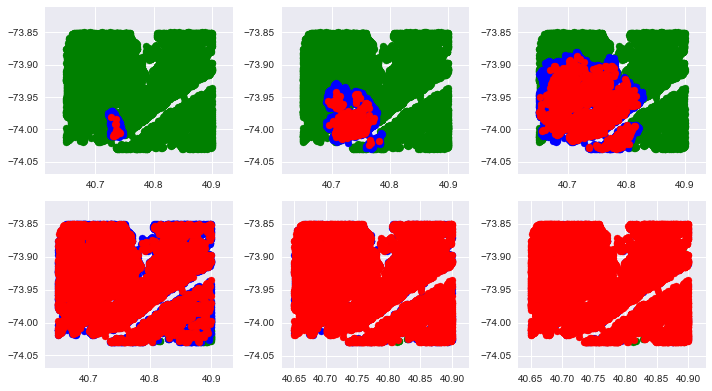

In [38]:
plt.figure(figsize=(10,8))
plt.subplot(331)
visualize_spread(1)
plt.subplot(332)
visualize_spread(3)
plt.subplot(333)
visualize_spread(5)
plt.subplot(334)
visualize_spread(10)
plt.subplot(335)
visualize_spread(20)
plt.subplot(336)
visualize_spread(30)
plt.tight_layout()
plt.show()


---

### 2.3.1 Stop the apocalypse!

#### Exercise 2.10: Strategy 1

In [ ]:
bico

#### Exercise 2.11: Strategy 2

In [ ]:
points = list(nx.articulation_points(G))
len(points)

In [ ]:
points[0]

In [ ]:
s = [G[i] for i in points]

In [ ]:
s